# GMM(Gaussian MixTure Model)

GMM 군집화 : 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행.

### 정규 분포(Normal distribution) - 가우시안 분포

* 좌우 대칭형의 종(Bell) 형태를 가진 연속 확률 함수.

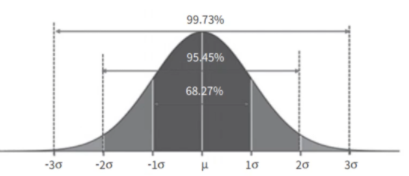

* 정규 분포는 평균 μ를 중심으로 높은 데이터 분포도를 가지고 있다.
* 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있다.
* 평균이 0이고, 표준 편차가 1인 정규 분포를 표준 정규 분포라고 한다.

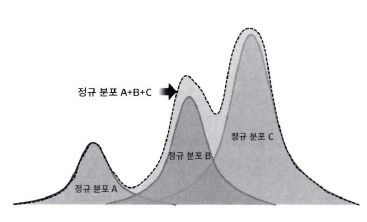

* GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주. -> 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출
* 위 그림을 보면 A, B, C 라는 정규 분포가 합쳐서 된 데이터 분포라고 하자.
* 전체 데이터 세트는 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화 하는 것이 **GMM 군집화 방식**이라고 한다.
* 데이터 세트를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식 => 모수 추정

#### 모수 추청
* 개별 정규 분포의 평균과 분삭
* 각 데이터가 어떤 정규 분포에 해당되는지의 확률
* 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용.

**사이킷런의 GMM -> EM 방식을 통한 모수 추정 군집화를 지원하는 GaussianMixtrue 클래스를 지원.**

In [1]:
# GMM을 이요한 붓꽃 데이터 세트 군집화
# GMM은 확률 기반 군집화, K-평균은 거리 기반 군집화
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

### GaussianMixture 객체의 파라미터
* 가장 중요한 초기화 파라미터 n_components = gaussian mixture의 모델의 총 개수

GaussianMixture 클래스는 sklean.mixture 패키지에 위치해 있다.

GaussianMixture 객체의 fit(피처 데이터 세트)와 predict(피처 데이터 세트)를 수행해 군집을 결정한 뒤 irisDF DataFrame에 'gmm_cluster' 칼럼 명으로 저장하고 나서 타깃별로 군집.

In [2]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

target 0dms cluster 0으로, target 2는 cluster 1로 모두 잘 매핑되었는데, 1의 경우만 cluster 2로 45개(90%), cluster 1로 5개(10%) 매핑되었다. 

In [3]:
# K-평균 군비화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
iris_result

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64

#### 붓꽃 데이터 세트는 GMM 군집화에 더 효과적!!!

* K-평균 : 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 **개별 군집 내의 데이터가 원형으로 흩어져 있는 경우**에 매우 효과적.

# GMM과 K-평균 비교

### K-평균 : KMeans
* 원형 범위에서 군집화 수행
* 데이터 세트가 원형의 범위를 가질수록 효율이 높아짐
* cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있음

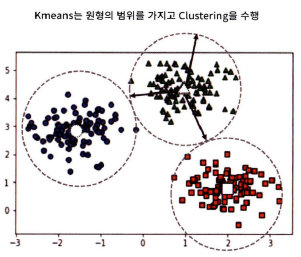

### 시각화 함수 : visualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=True)

* clusterobj : 사이킷런의 군집 수행 객체. Kmeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아닌 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력
* dataframe : 피처 데이터 세트와 label 값을 가진 DataFrame
* label_name : 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명. make_bolbs() 결과 시각화일 경우 dataframe 내의 target 칼럼 명
* iscenter : 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [4]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

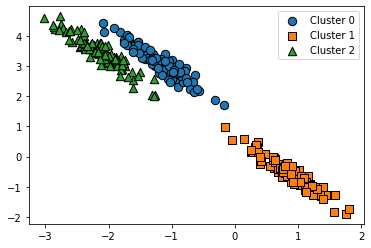

In [5]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

Kmeans는 원형 데이터에 효과가 있지만 위와 같이 길게 늘어진 데이터 세트에서는 정확성이 떨어진다.

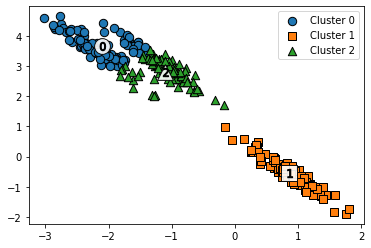

In [6]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans로 군집화 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않는다.

### GMM

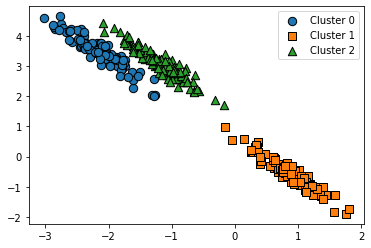

In [7]:
# 3개의 n_componenets 기반 GMM을 X_aniso 데이터 세트에 적용
gmm =GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

데이터가 분포된 방향에 따라 정확하게 군집화되었다.

GMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화되지 않는다.

make_blobs()의 target 값과 KMeans, GMM의 군집 Label 값을 서로 비교해 위와 같은 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인.

In [8]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


### 결론

* KMeans
    * 군집 1번만 정확히 매핑되고, 나머지 군집의 경우 target 값과 어긋하는 경우가 발생.

* GMM
    * 군집이 target 값과 잘 매핑되어 있다.

GMM의 경우 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있지만, 군집화 수행 시간이 오래걸린다.